In [1]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

import numpy as np
import glob

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [2]:
def plot_from_file(file_name):
    data = np.load('./Data/' + file_name + '.npz')
    
    if file_name[:3] == 'iid':
        plot_title = r'I.I.D. Gaussian noise with mean 0 and variance 1, $d = ' + file_name[5:7] + '$'
        save_name = file_name[:7]
    else:
        plot_title = r'Correlated Gaussian noise with Toepiltz covariance matrix ($\rho = 0.5$), $d = ' + file_name[10:12] + '$'
        save_name = file_name[:12]

    if data.files != ['delta', 'mu', 'xi', 'EC_SCGD_recording_idx', 'iterations', 'optimal_value', 'optimal_cvar', 'optimal_x', 'EC_SCGD_cvar_path', 'EC_SCGD_value', 'EC_SCGD_x', 'Sigma', 'dim', 'gamma', 'EC_SCGD_CVaR', 'EC_SCGD_obj_path']:
        print("File error!")
        return 0
    
    if file_name[5:7] == '50' or file_name[10:12] == '50':
        ylim_UB = 0.1
        ylim_LB = -0.025
    else:
        ylim_UB = 0.65
        ylim_LB = -0.15
    
    fig, axs = plt.subplots(1, 2, figsize=(10, 3.5),dpi=300)

    fig.suptitle(plot_title)

    axs[0].loglog(data["EC_SCGD_recording_idx"], (data["optimal_value"] - np.array(data["EC_SCGD_obj_path"])), label = r'$F^{*} - F(t)$')
    axs[0].loglog(data["EC_SCGD_recording_idx"], np.maximum(0,np.array(data["EC_SCGD_cvar_path"]) - data["optimal_cvar"]), '--', label = r'$\left(\mathrm{CVaR}_{0.95}(t) - \xi\right)_+$')
    axs[0].loglog(data["EC_SCGD_recording_idx"], 1/np.sqrt(data["EC_SCGD_recording_idx"]), 'k-.', label = r'$1/\sqrt{t}$', alpha = 0.25)
    axs[0].set_xlim([1e4,np.max(data["EC_SCGD_recording_idx"])])
    axs[0].set_ylim([1e-5,1])
    axs[0].grid()
    axs[0].legend()
    axs[0].set_title("Log-scale",fontsize=10)
    axs[0].set_xlabel(r'Iteration $t$')

    axs[1].plot(data["EC_SCGD_recording_idx"], (data["optimal_value"] - np.array(data["EC_SCGD_obj_path"])), label = r'$F^{*} - F(t)$')
    axs[1].plot(data["EC_SCGD_recording_idx"], np.array(data["EC_SCGD_cvar_path"]) - data["optimal_cvar"], '--', label = r'$\mathrm{CVaR}_{0.95}(t) - \xi$')
    axs[1].set_xlim([0,2e5])
    axs[1].set_ylim([ylim_LB,ylim_UB])
    axs[1].grid()
    axs[1].legend(fontsize=10)
    axs[1].set_title("Linear-scale",fontsize=10)
    axs[1].set_xlabel(r'Iteration $t$')
    axs[1].xaxis.set_major_locator(ticker.MaxNLocator(6))
    axs[1].yaxis.set_major_locator(ticker.MaxNLocator(6))

    plt.savefig('./' + save_name + '.svg', bbox_inches='tight')    
    plt.show()


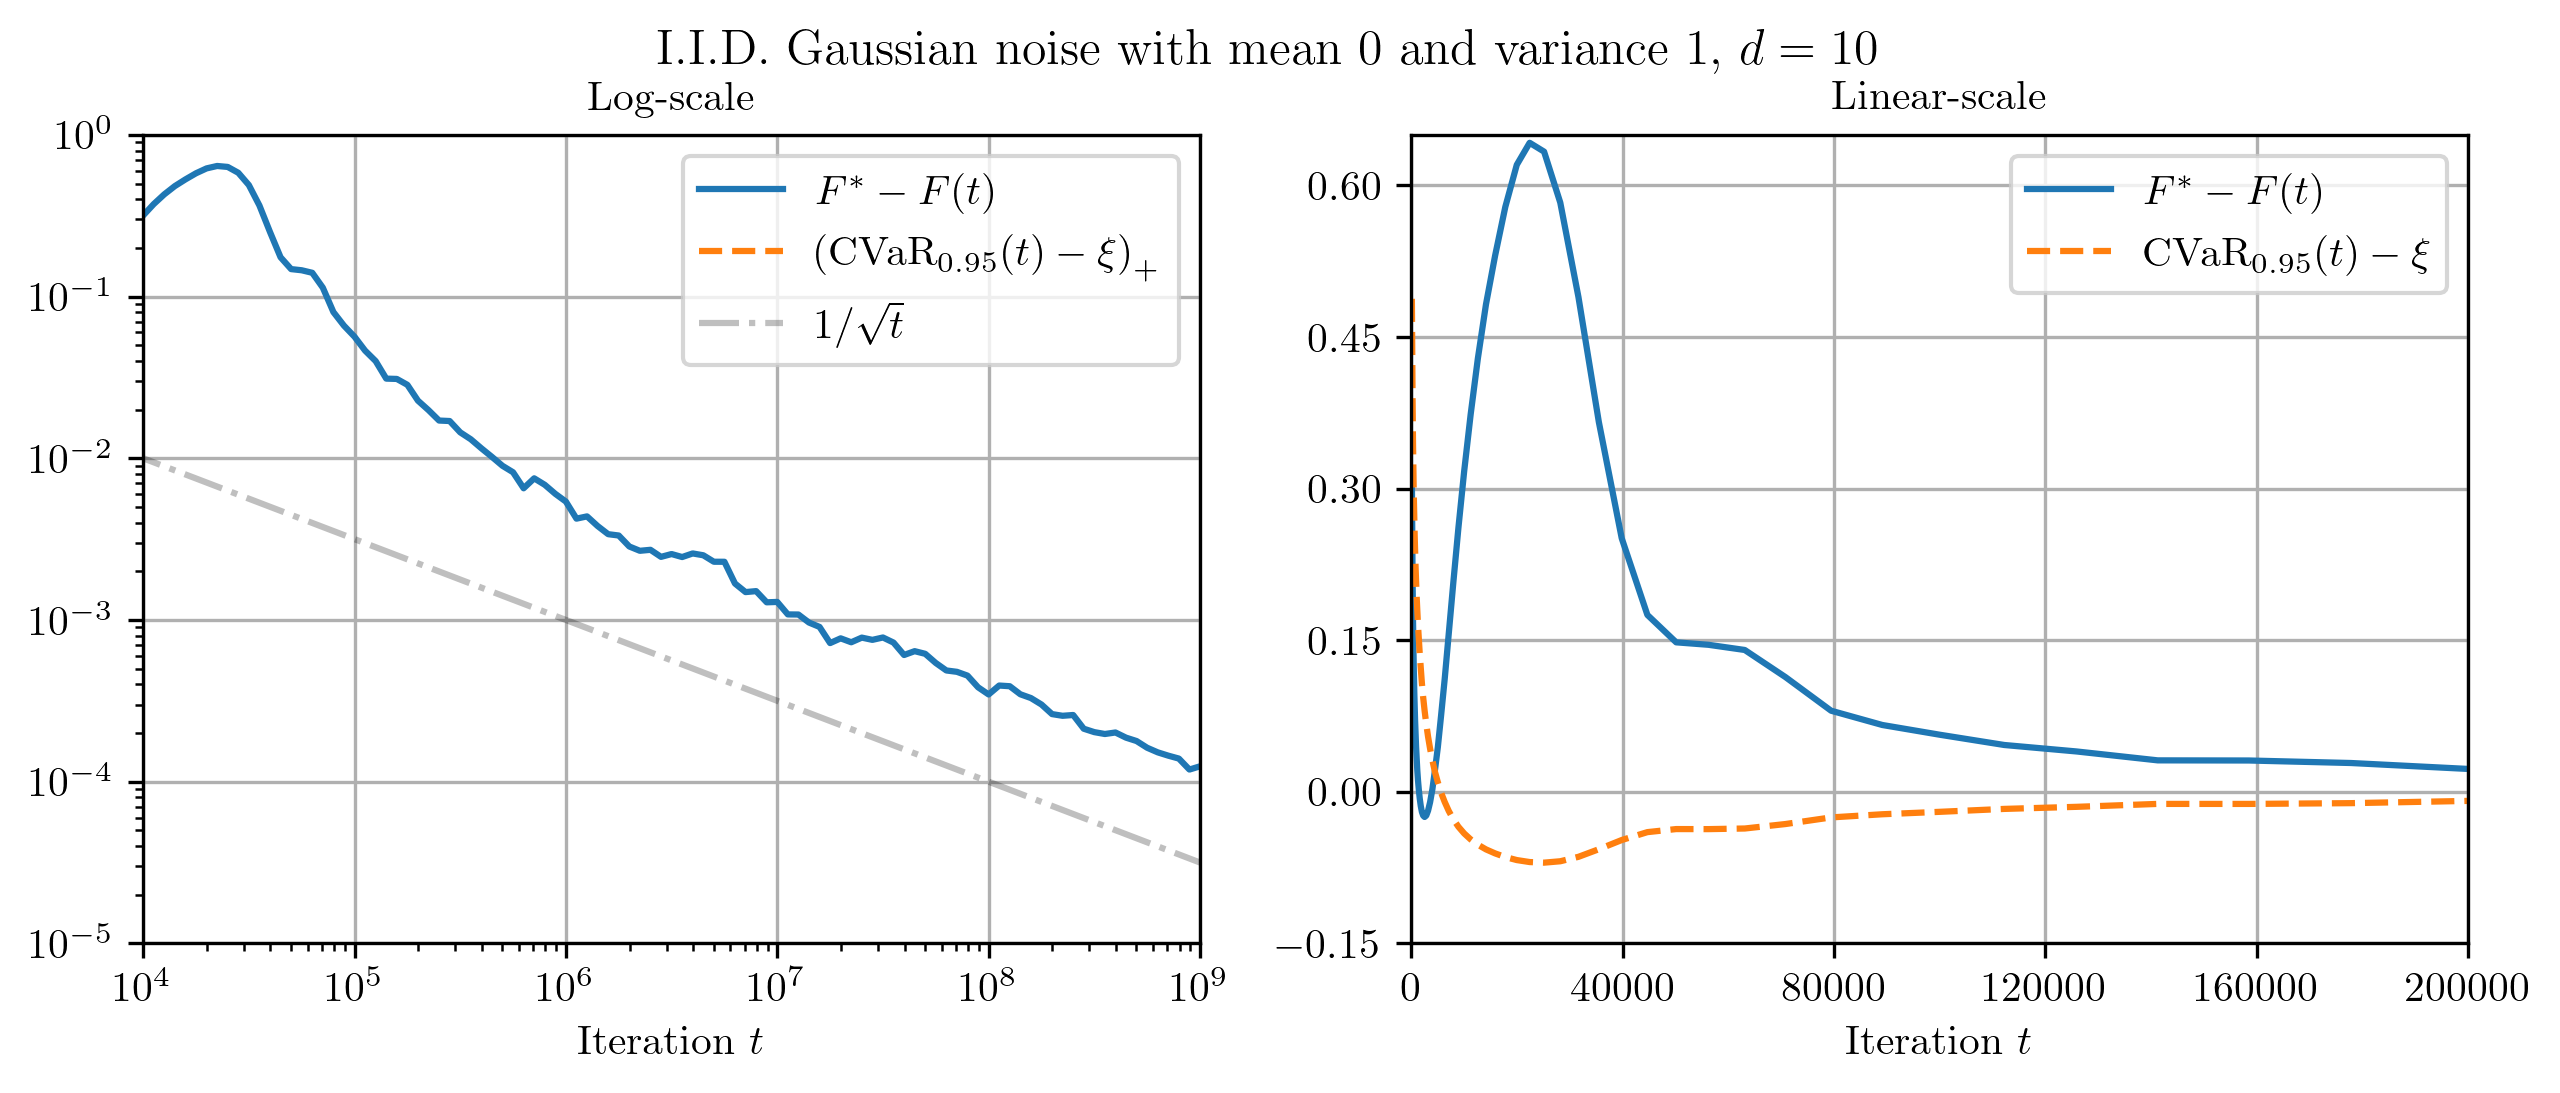

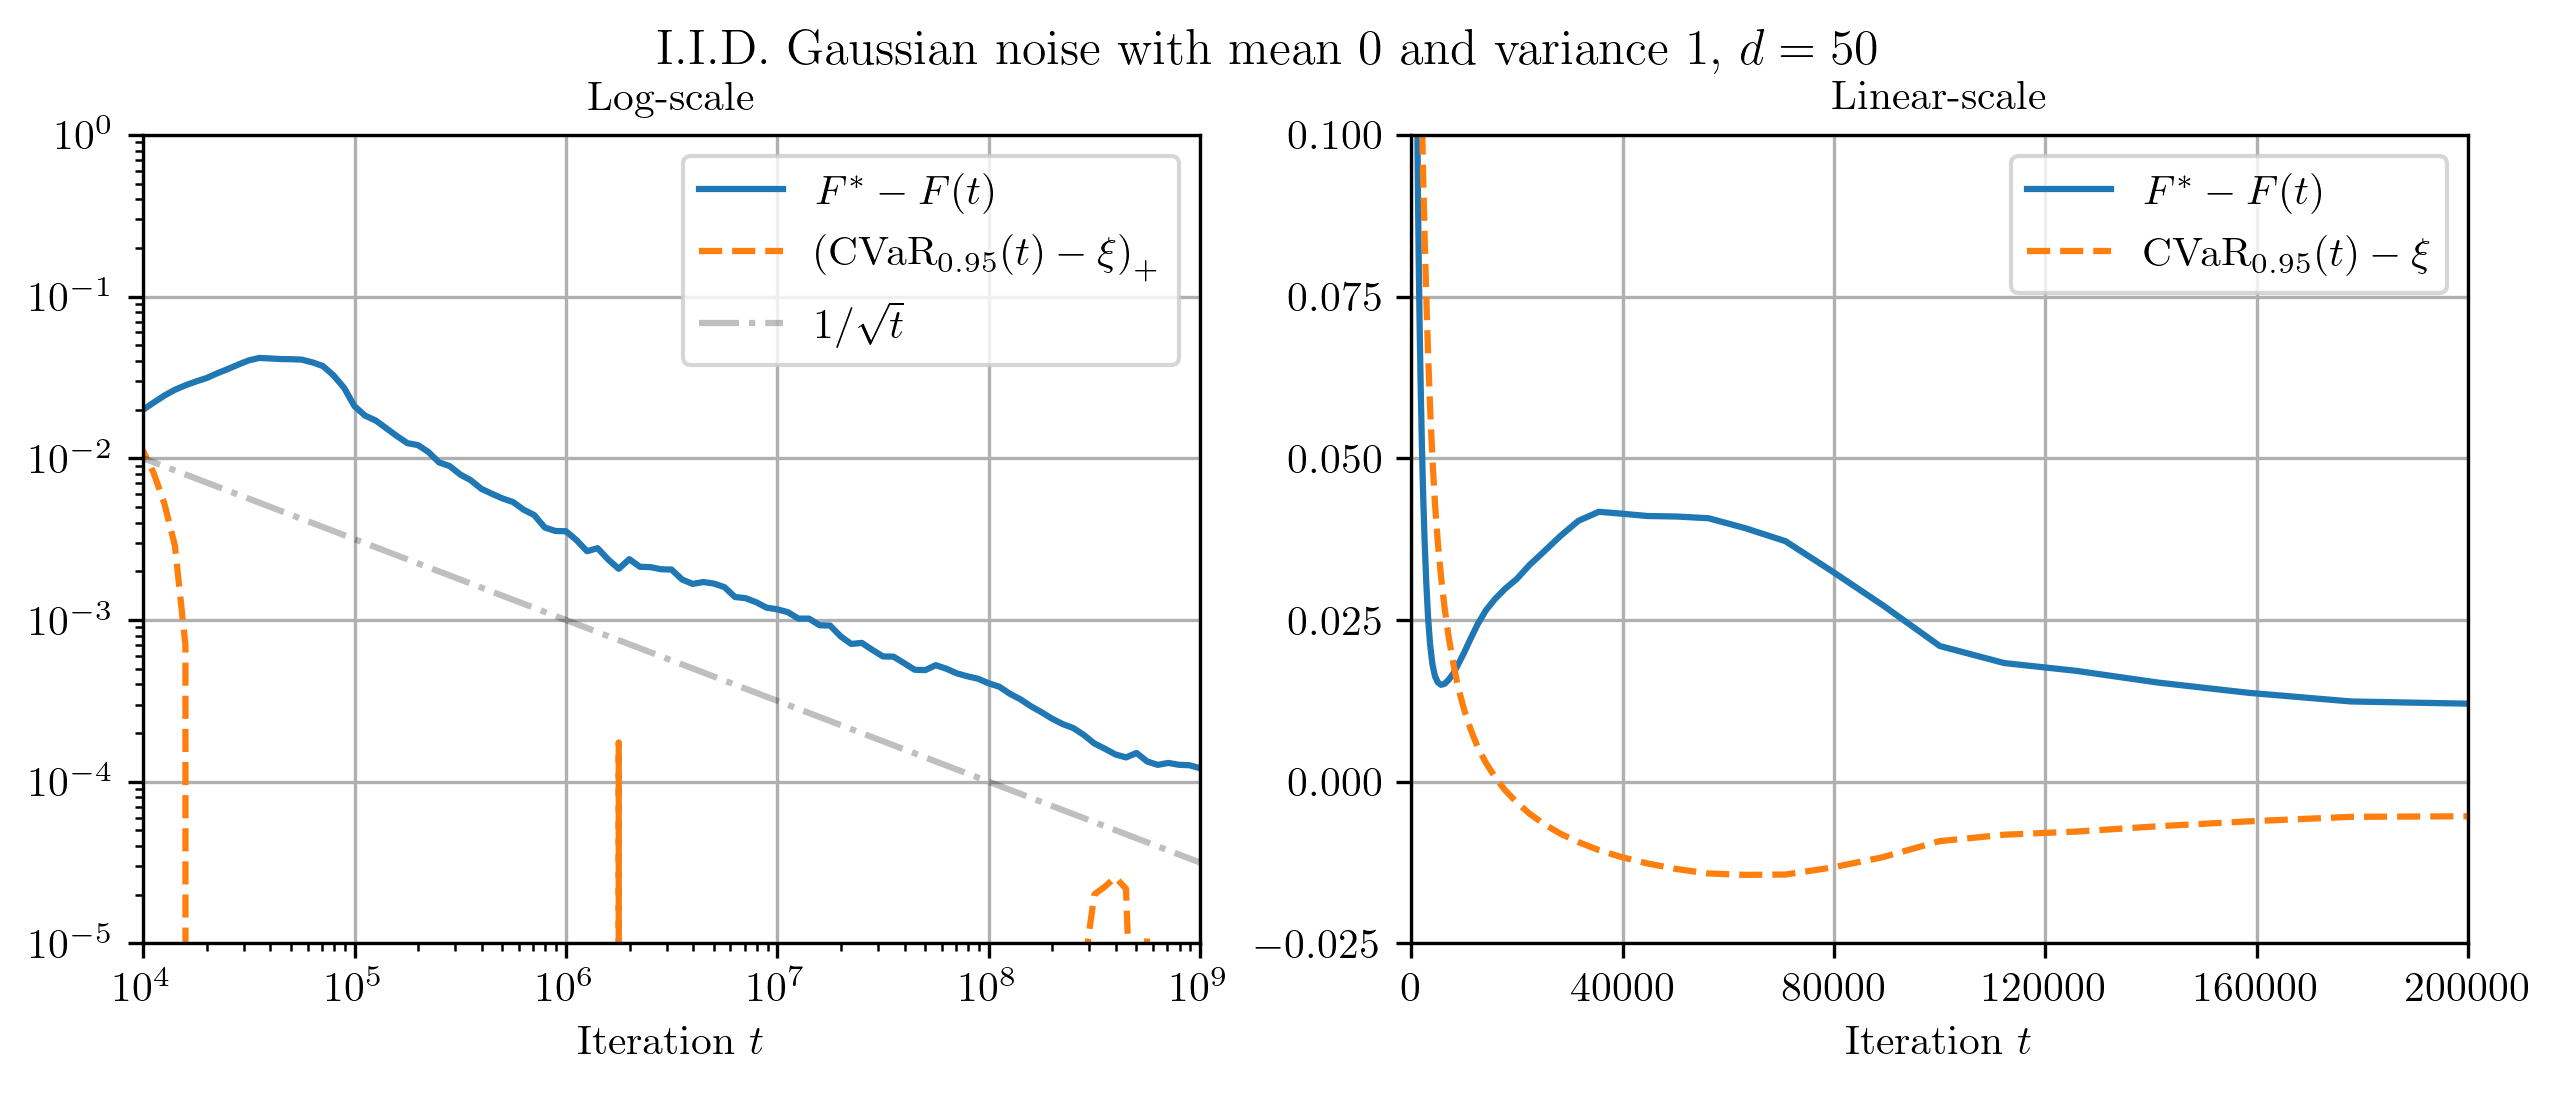

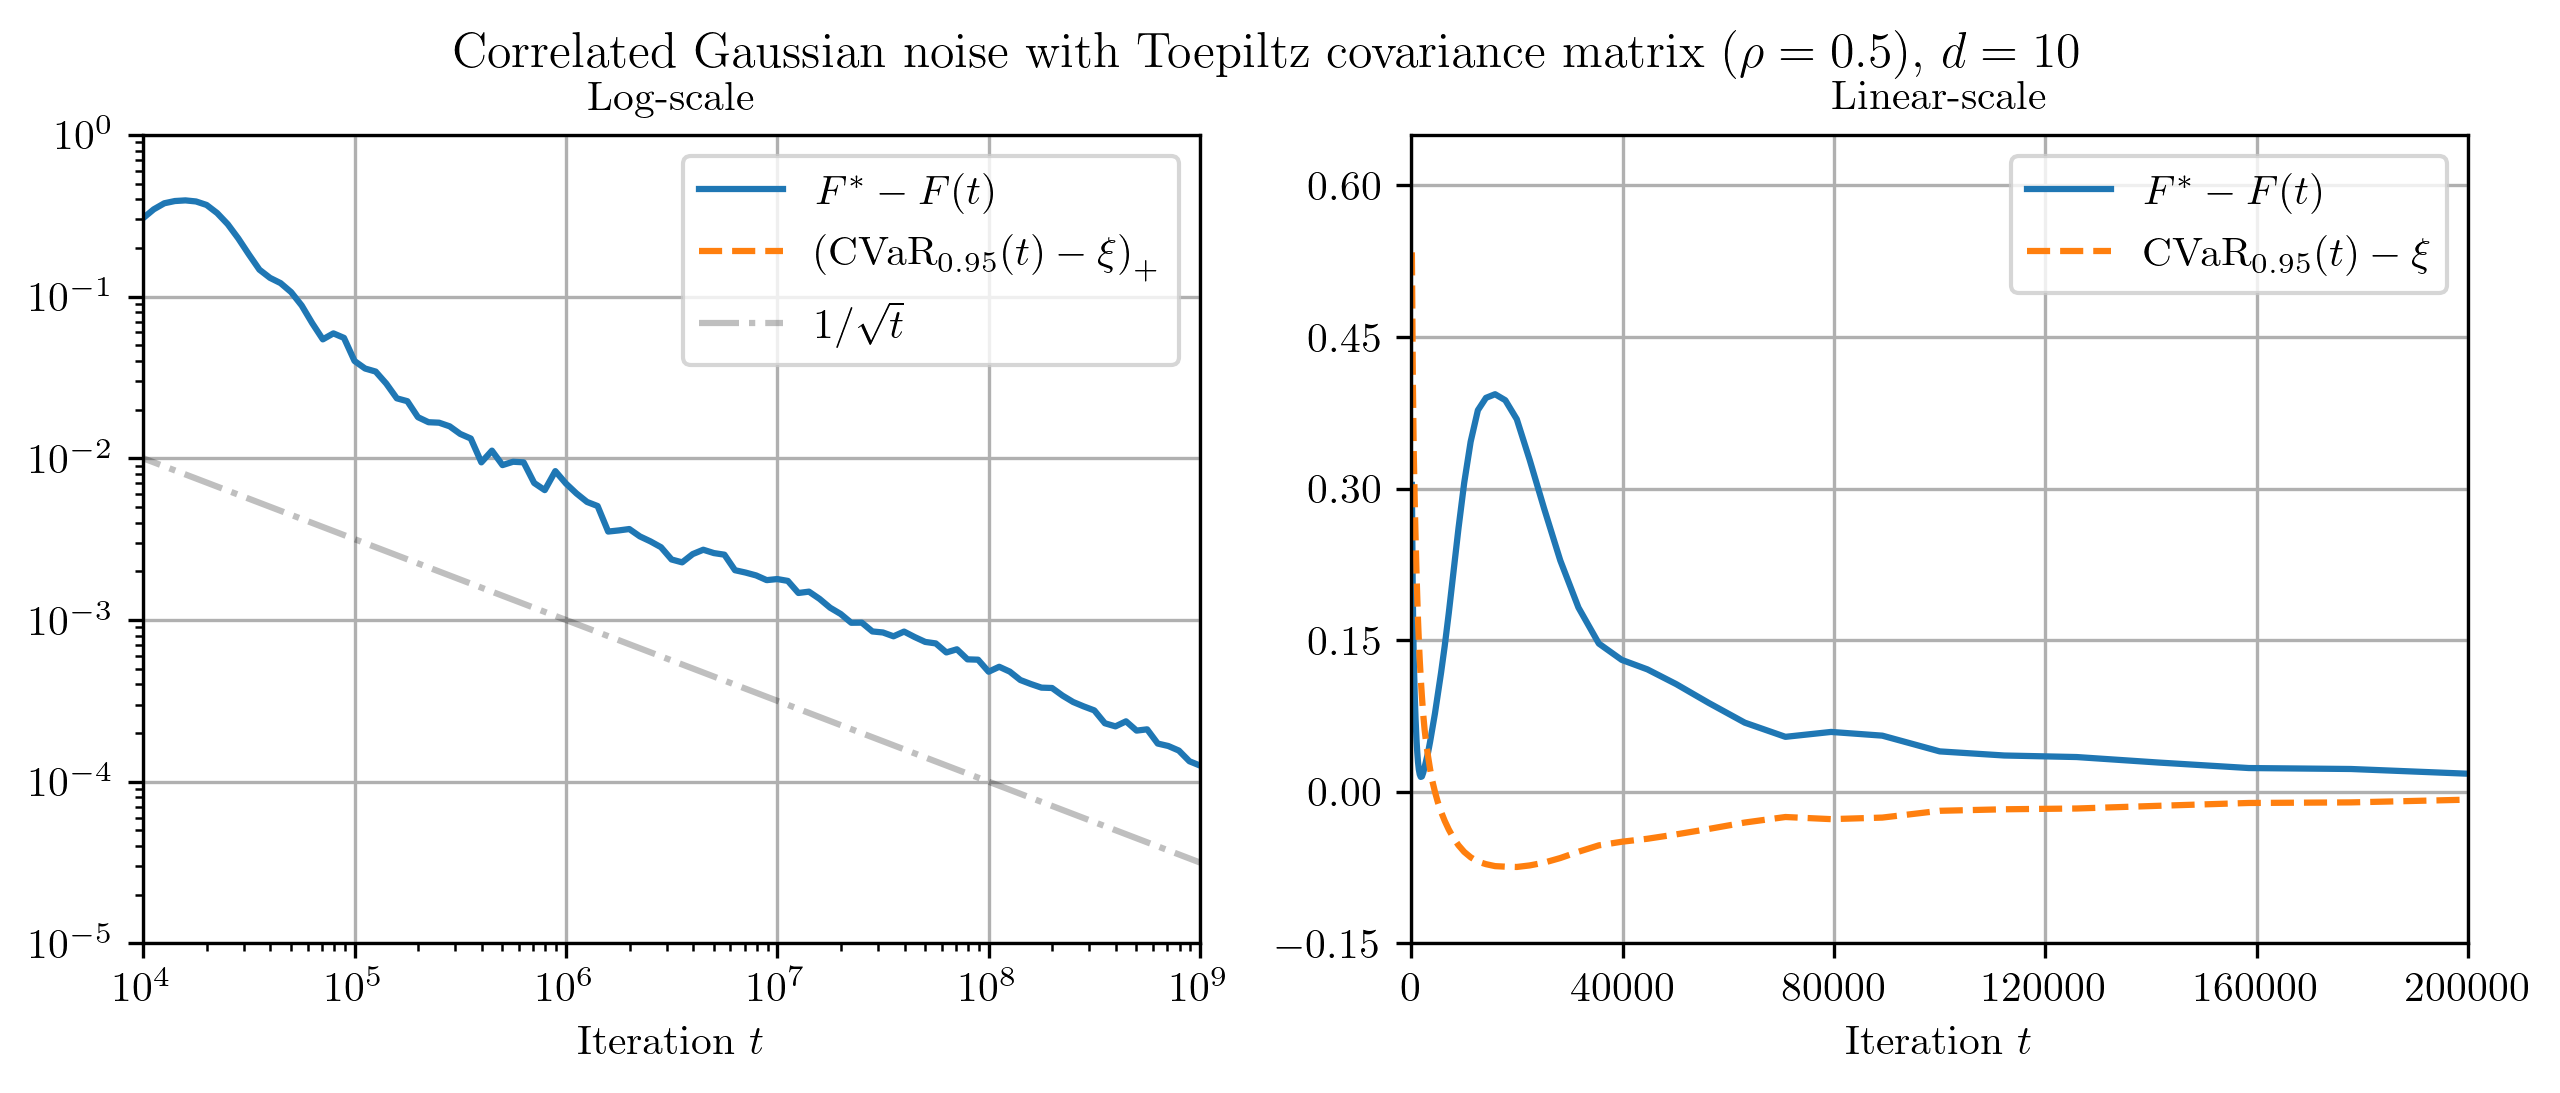

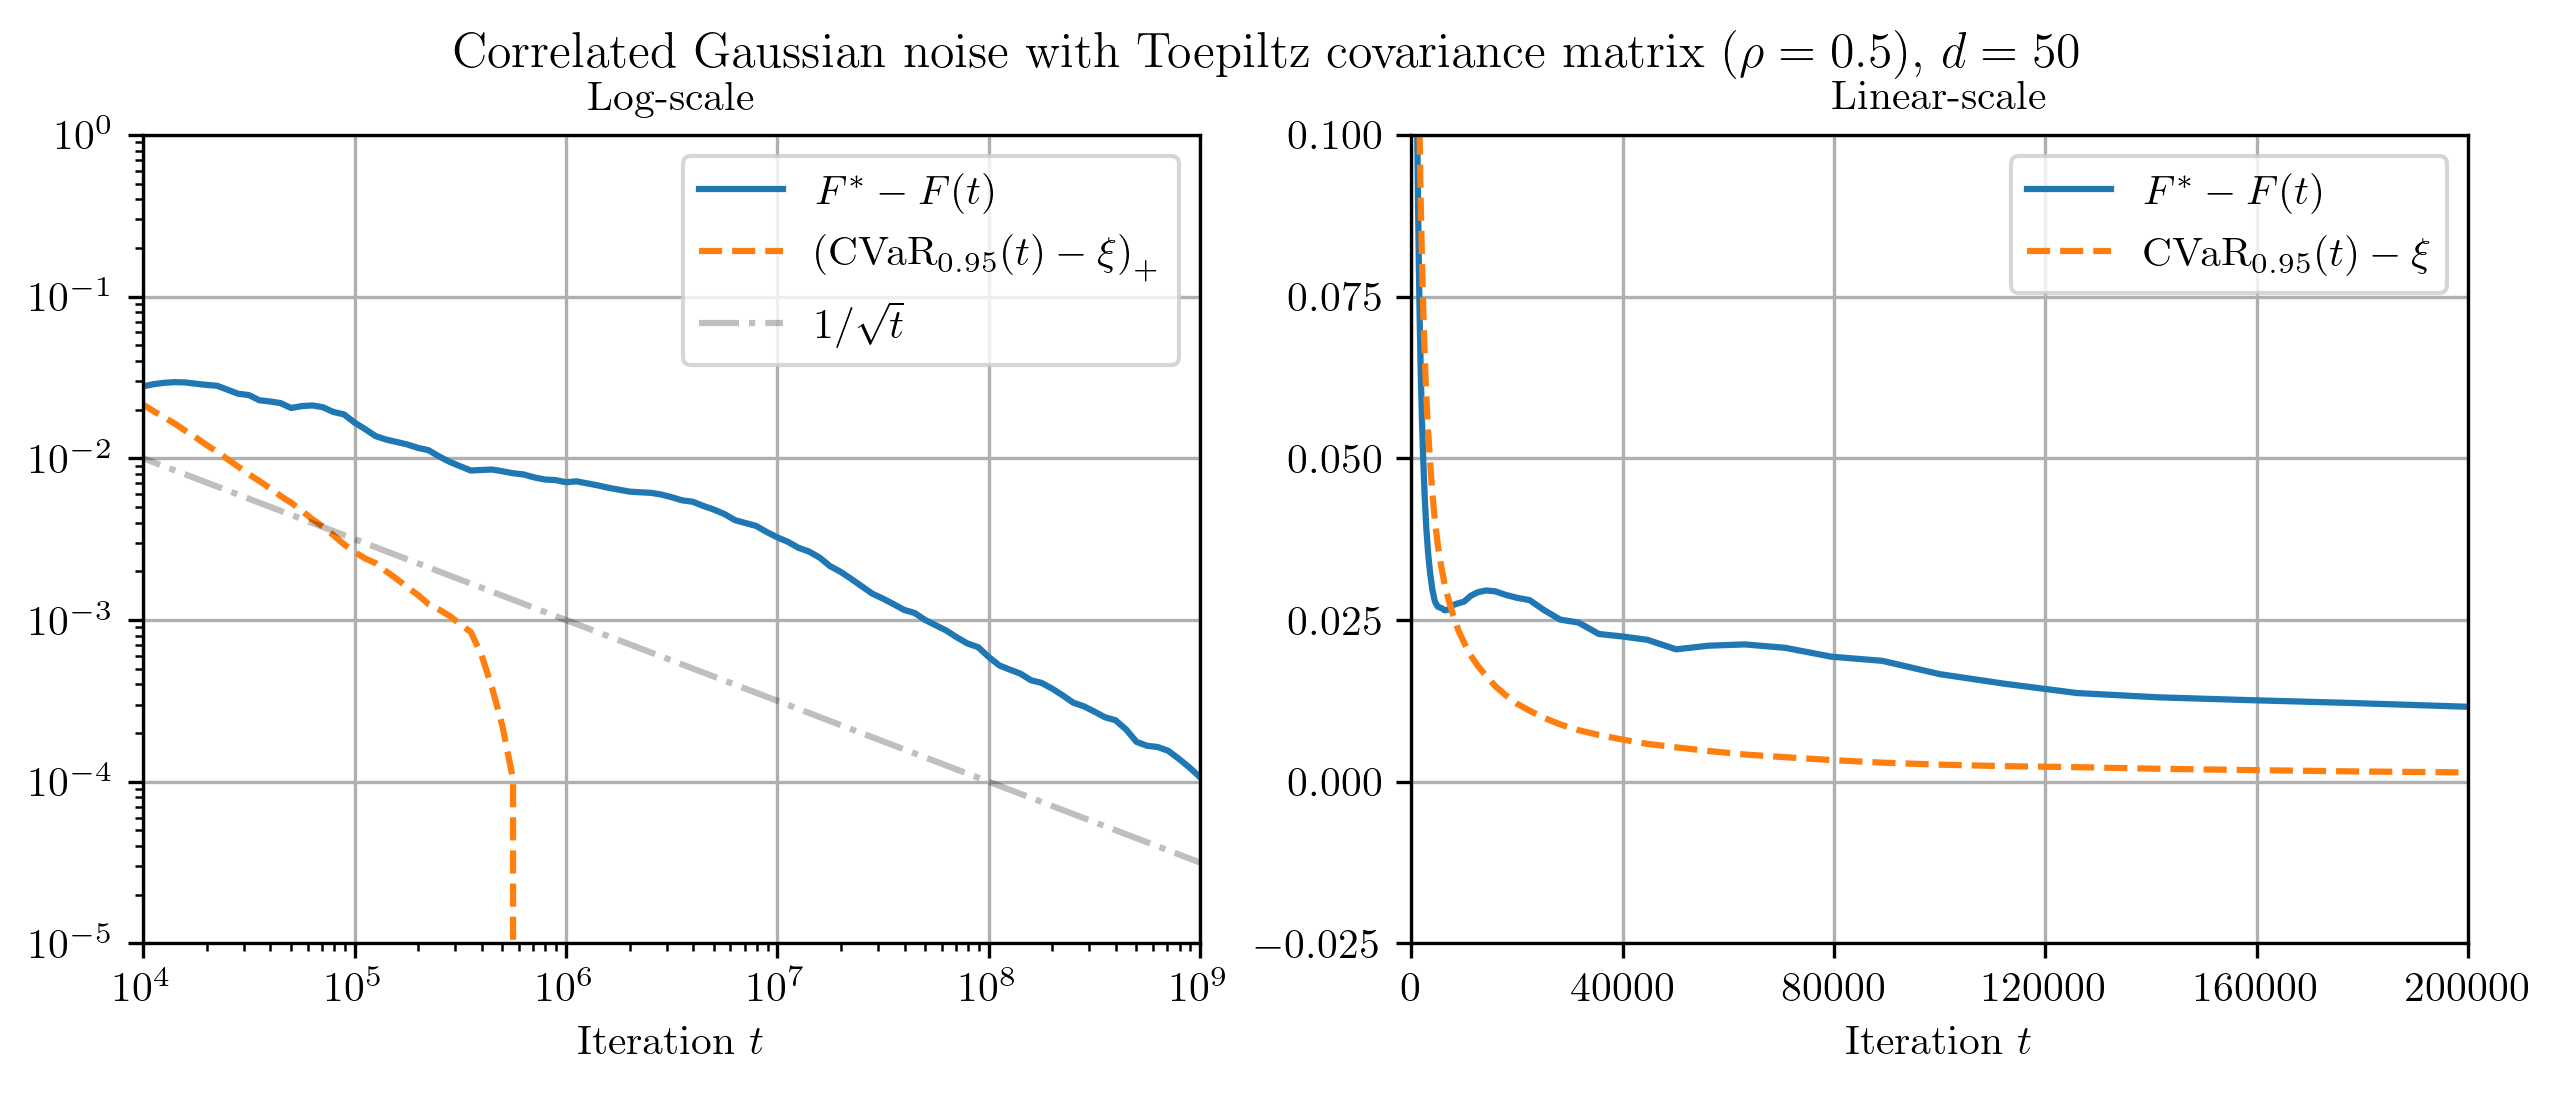

In [3]:
npz_files = glob.glob('./Data/*.npz')
for file_name in npz_files:
    file_name = file_name[7:-4]
    plot_from_file(file_name)